# Лабораторна робота №3  
## OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version)

**Студент:** Ярмішко Герман
**Група:** КІ-23-1
**Середовище:** Yarmishko_OpenCV

**Мета роботи:**  
знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

## Завдання 1 Обробка зображення

### 1. Негатив

Градаційне перетворення для отримання негативу зображення визначається формулою:

$[
g(x, y) = L - 1 - f(x, y)
]$

де:
- $(f(x, y))$ — значення інтенсивності пікселя у початковому зображенні,
- $(g(x, y))$ — значення інтенсивності у негативному зображенні,
- $(L)$ — кількість рівнів інтенсивності (для 8-бітного зображення \(L = 256\)).

Ця формула інвертує яскравість пікселів: світлі стають темними, а темні — світлими.

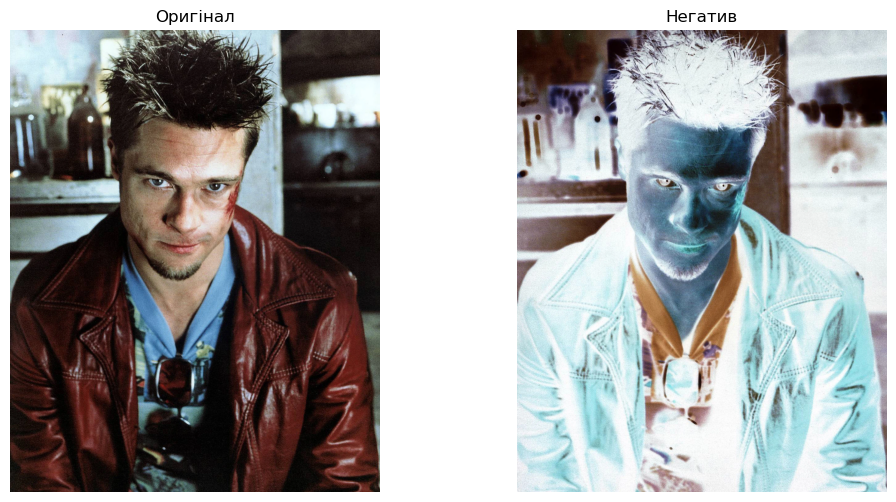

In [13]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")

if img is None:
    print("Зображення не знайдено!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Обчислюємо негатив
    negative = 255 - img_rgb

    # Візуалізуємо
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Оригінал")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(negative)
    plt.title("Негатив")
    plt.axis("off")

    plt.show()

### 2.Логарифмічні перетворення

Градаційне логарифмічне перетворення визначається формулою:

$[
g(x, y) = c \cdot \log(1 + f(x, y))
]$

де:
- $(f(x, y))$ — значення інтенсивності пікселя в оригінальному зображенні,
- $(g(x, y))$ — значення інтенсивності в перетвореному зображенні,
- $(c)$ — константа (звичайно \(c = 255 / \log(1 + \text{max}(f))\)),
- логарифм допомагає посилювати темніші області і стискати яскраві.

Логарифмічне перетворення корисне, коли треба **виділити деталі у темних ділянках зображення**.

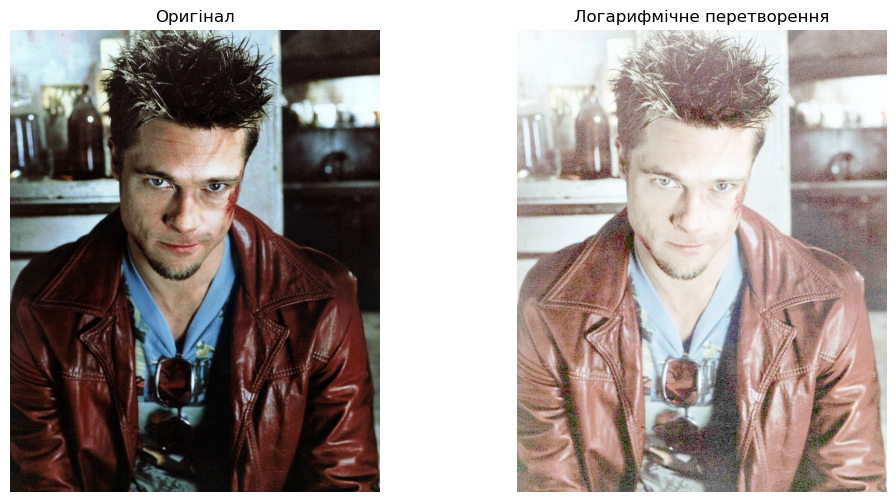

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")

if img is None:
    print("Зображення не знайдено!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_float = img_rgb.astype(float)

    c = 255 / np.log(1 + np.max(img_float))

    log_image = c * np.log(1 + img_float)

    log_image = np.array(log_image, dtype=np.uint8)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Оригінал")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(log_image)
    plt.title("Логарифмічне перетворення")
    plt.axis("off")

    plt.show()

### 3.Степенева(гамма-коеркція)

Градаційне перетворення для гамма-корекції визначається формулою:

$[
g(x, y) = c \cdot [f(x, y)]^\gamma
]$

де:
- $(f(x, y))$ — значення інтенсивності пікселя в оригінальному зображенні,
- $(g(x, y))$ — значення інтенсивності в перетвореному зображенні,
- $(c)$ — константа масштабування (часто \(c = 1\)),
- $(\gamma)$ — параметр корекції (гамма).

Якщо $(\gamma < 1)$, зображення стає світлішим;  
якщо $(\gamma > 1)$, зображення стає темнішим.

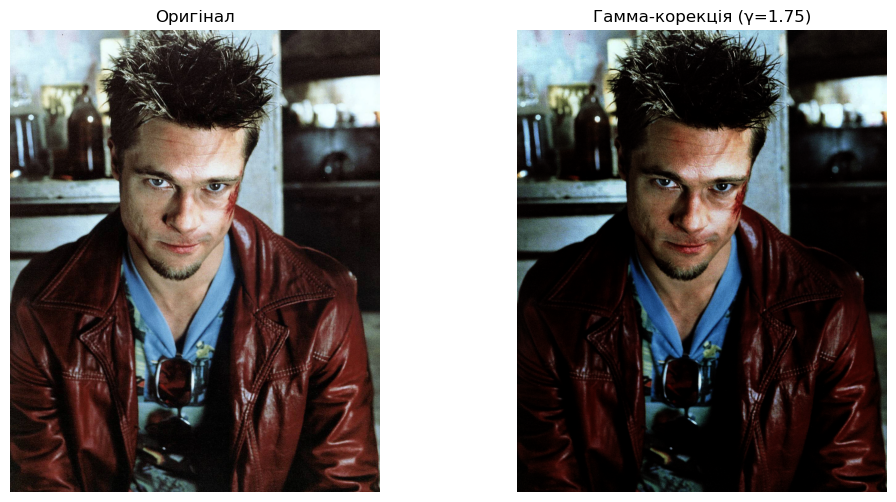

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")

if img is None:
    print("Зображення не знайдено!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_norm = img_rgb / 255.0
    gamma = 1.75  
    gamma_corrected = np.power(img_norm, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Оригінал")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gamma_corrected)
    plt.title(f"Гамма-корекція (γ={gamma})")
    plt.axis("off")

    plt.show()

### 4.Cолярізація

Градаційне перетворення для соляризації зображення можна описати так:

$[
g(x, y) =
\begin{cases}
L - 1 - f(x, y), & \text{якщо } f(x, y) > T \\
f(x, y), & \text{якщо } f(x, y) \leq T
\end{cases}
]$

де:
- $(f(x,y))$ — значення інтенсивності пікселя оригінального зображення;
- $(g(x,y))$ — нове значення після соляризації;
- $(T)$ — поріг соляризації;
- $(L)$ — максимальна інтенсивність (для 8-бітних зображень $(L=256))$.

Ідея: пікселі, що перевищують поріг \(T\), інвертуються, тоді як інші лишаються без змін.

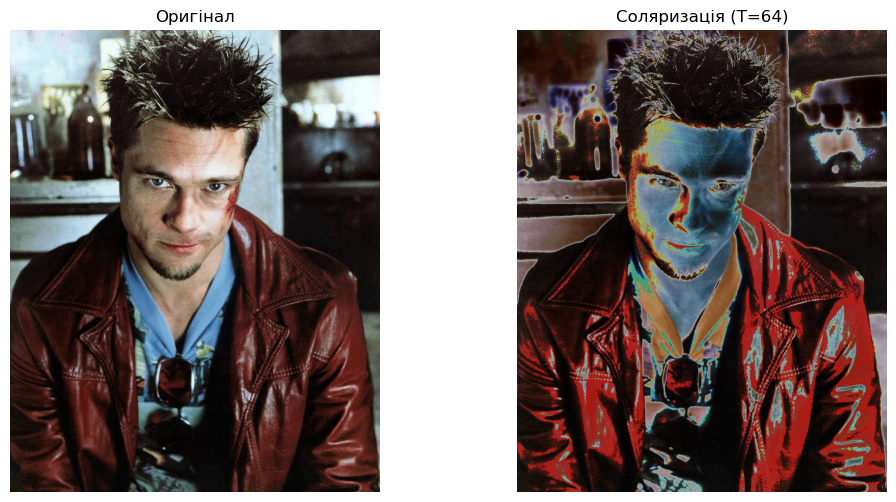

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")

if img is None:
    print("Зображення не знайдено!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    threshold = 64  

    solarized = img_rgb.copy()

    mask = solarized > threshold
    solarized[mask] = 255 - solarized[mask]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Оригінал")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(solarized)
    plt.title(f"Соляризація (T={threshold})")
    plt.axis("off")

    plt.show()

## Завдання 2 Відозміна гістограми

### 5.Еквалізація гістограми

Еквалізація гістограми — метод підвищення контрастності зображення шляхом перерозподілу  
інтенсивностей пікселів так, щоб гістограма була більш «рівномірною».

Ідея в тому, щоб:
- темні ділянки стають світлішими,
- світлі ділянки темнішими,
- а середні — розтягнуті для покращення видимості деталей.

Математично це реалізується через **функцію розподілу накопичених ймовірностей (CDF)**:

$[
s_k = \text{round}\left( \frac{L-1}{MN} \sum_{j=0}^{k} h_j \right)
]$

де:
- $(s_k)$ — нове значення яскравості для рівня \(k\),
- $(L)$ — кількість рівнів інтенсивності (для 8-бітних зображень \(L = 256\)),
- $(h_j)$ — значення гістограми для рівня \(j\),
- $(M, N)$ — розміри зображення.

Ця формула гарантує, що результуюча гістограма буде більш рівномірною,
а контраст — підвищеним.

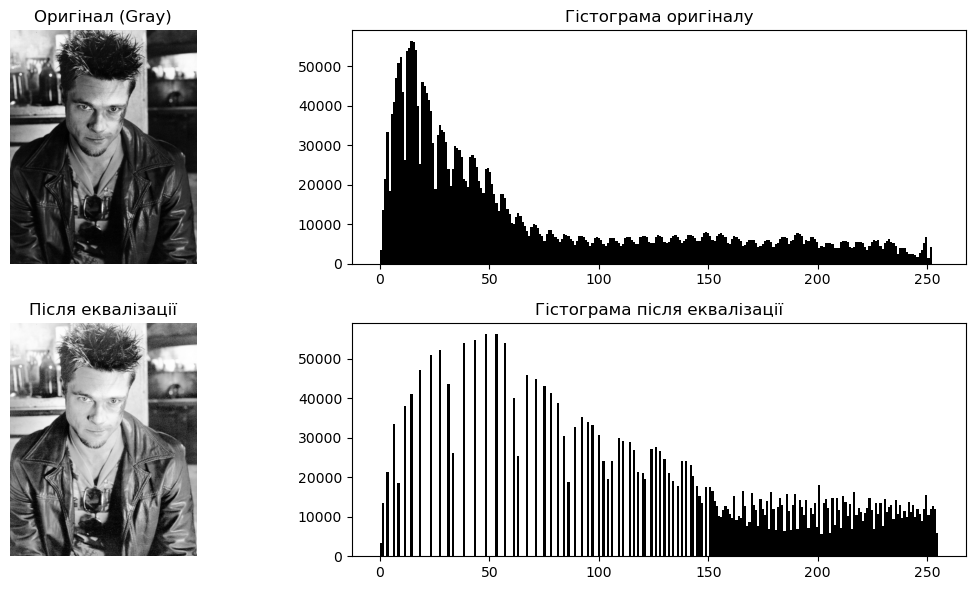

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Зображення не знайдено!")
else:
    equalized = cv2.equalizeHist(img)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Оригінал (Gray)")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.hist(img.ravel(), bins=256, color="black")
    plt.title("Гістограма оригіналу")

    plt.subplot(2, 2, 3)
    plt.imshow(equalized, cmap="gray")
    plt.title("Після еквалізації")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.hist(equalized.ravel(), bins=256, color="black")
    plt.title("Гістограма після еквалізації")

    plt.tight_layout()
    plt.show()

###  6.Оцінка гістограми

Гістограма зображення — це графік розподілу кількості пікселів
за значеннями яскравості.

Для зображення в градаціях сірого гістограма показує,
скільки пікселів має кожне значення інтенсивності
в діапазоні від 0 до 255.

Оцінка гістограми дозволяє:
- визначити рівень контрасту зображення;
- виявити переважання темних або світлих ділянок;
- оцінити ефективність методів покращення зображення
  (наприклад, еквалізації гістограми).

В OpenCV гістограма обчислюється за допомогою функції `cv2.calcHist`,
яка реалізує підрахунок частоти появи кожного рівня інтенсивності.

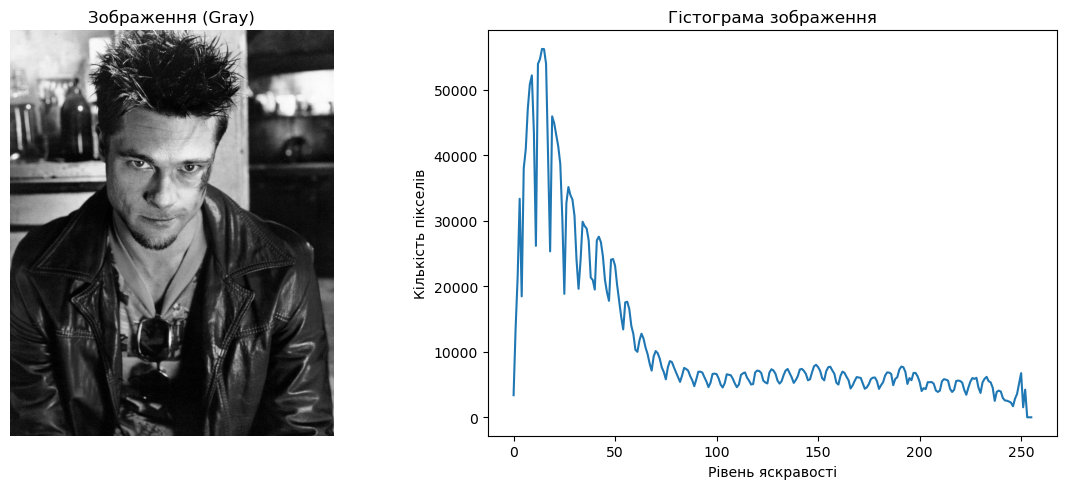

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Зображення не знайдено!")
else:
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Зображення (Gray)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.plot(hist)
    plt.title("Гістограма зображення")
    plt.xlabel("Рівень яскравості")
    plt.ylabel("Кількість пікселів")

    plt.tight_layout()
    plt.show()

## Висновок

У ході виконання лабораторної роботи було досліджено основні просторові методи покращення зображень.
Для власного цифрового портрету були реалізовані градаційні перетворення, зокрема негатив, логарифмічне та степеневе (гамма-корекція) перетворення,
а також соляризація зображення.

Крім того, було виконано еквалізацію гістограми та проведено оцінку гістограми зображення, що дозволило проаналізувати розподіл яскравостей
і вплив різних методів обробки на контраст.

## Контрольні запитання

### 1.У чому полягає сенс градаційних перетворень?
Сенс градаційних перетворень полягає у зміні значень яскравості
пікселів зображення без зміни їх просторового розташування.
Такі перетворення використовуються для покращення контрасту,
виділення деталей та покращення візуального сприйняття зображення.
### 2.На чому ґрунтуються гістограмні методи?
Гістограмні методи ґрунтуються на аналізі розподілу
яскравостей пікселів зображення за допомогою гістограми.
Використовуючи інформацію про частоту появи рівнів інтенсивності,
можна змінювати контраст зображення, зокрема шляхом
еквалізації гістограми.